In [1]:
VERSION = 33

FOCAL_LOSS = 0
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = True
DATA_SMALL = False

In [2]:
if VERSION in [31,32]:
    TRAIN_ON_STAGE_1 = False
else:
    TRAIN_ON_STAGE_1 = True

if VERSION in [32,34,36]:
    WEIGHTED = True
else:
    WEIGHTED = False

In [3]:
%run ./Code.ipynb

In [4]:
if VERSION in [31,32]:
    # old features, no stage2 training
    train_md, test_md = loadMetadata()
elif VERSION in [33,34]:
    # old features, with stage2 training
    train_md, test_md = loadMetadata3()
elif VERSION in [35,36]:
    # new features
    train_md, test_md = loadMetadata2()

# OOF

In [21]:
stg = time.time()
for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    for fold in range(folds):
        #pp = pickle.load(open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb'))
        predictions = oof_one(num_iter=32, bs=32, fold=fold, dataset=ds)
        #predictions = np.concatenate([pp,predictions],axis=0)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 3 iters starting now: 32
adding dummy serieses 14
DataSet 7 valid size 7232 fold 0
dataset valid: 7232 loader valid: 226
loading model model.b3.f0.d7.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.039 time per batch: 0.221
Batch 100 device: cuda time passed: 19.674 time per batch: 0.197
Batch 150 device: cuda time passed: 28.256 time per batch: 0.188
Batch 200 device: cuda time passed: 36.735 time per batch: 0.184
ver 34, iter 0, fold 0, val ll: 0.0629, cor: 0.8425, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.369 time per batch: 0.227
Batch 100 device: cuda time passed: 19.874 time per batch: 0.199
Batch 150 device: cuda time passed: 28.322 time per batch: 0.189
Batch 200 device: cuda time passed: 36.820 time per batch: 0.184
ver 34, iter 1, fold 0, val ll: 0.0633, cor: 0.8416, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.085 time per batch: 0.222
Batch 100 device: cuda time passed: 19

Batch 50 device: cuda time passed: 11.373 time per batch: 0.227
Batch 100 device: cuda time passed: 19.848 time per batch: 0.198
Batch 150 device: cuda time passed: 28.645 time per batch: 0.191
Batch 200 device: cuda time passed: 37.166 time per batch: 0.186
ver 34, iter 23, fold 0, val ll: 0.0631, cor: 0.8424, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.732 time per batch: 0.235
Batch 100 device: cuda time passed: 20.379 time per batch: 0.204
Batch 150 device: cuda time passed: 28.964 time per batch: 0.193
Batch 200 device: cuda time passed: 37.185 time per batch: 0.186
ver 34, iter 24, fold 0, val ll: 0.0632, cor: 0.8421, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.942 time per batch: 0.219
Batch 100 device: cuda time passed: 19.584 time per batch: 0.196
Batch 150 device: cuda time passed: 27.962 time per batch: 0.186
Batch 200 device: cuda time passed: 36.295 time per batch: 0.181
ver 34, iter 25, fold 0, val ll: 0.0631

ver 34, iter 13, fold 1, val ll: 0.0642, cor: 0.8353, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.934 time per batch: 0.219
Batch 100 device: cuda time passed: 19.565 time per batch: 0.196
Batch 150 device: cuda time passed: 28.726 time per batch: 0.192
Batch 200 device: cuda time passed: 37.472 time per batch: 0.187
ver 34, iter 14, fold 1, val ll: 0.0644, cor: 0.8351, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.664 time per batch: 0.233
Batch 100 device: cuda time passed: 20.181 time per batch: 0.202
Batch 150 device: cuda time passed: 28.592 time per batch: 0.191
Batch 200 device: cuda time passed: 37.140 time per batch: 0.186
ver 34, iter 15, fold 1, val ll: 0.0642, cor: 0.8355, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.248 time per batch: 0.225
Batch 100 device: cuda time passed: 19.746 time per batch: 0.197
Batch 150 device: cuda time passed: 28.334 time per batch: 0.189
Batch 200 de

Batch 200 device: cuda time passed: 35.943 time per batch: 0.180
ver 34, iter 4, fold 2, val ll: 0.0602, cor: 0.8425, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.082 time per batch: 0.222
Batch 100 device: cuda time passed: 19.942 time per batch: 0.199
Batch 150 device: cuda time passed: 28.129 time per batch: 0.188
Batch 200 device: cuda time passed: 36.673 time per batch: 0.183
ver 34, iter 5, fold 2, val ll: 0.0602, cor: 0.8423, auc: 0.9894
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.475 time per batch: 0.229
Batch 100 device: cuda time passed: 19.975 time per batch: 0.200
Batch 150 device: cuda time passed: 28.403 time per batch: 0.189
Batch 200 device: cuda time passed: 36.868 time per batch: 0.184
ver 34, iter 6, fold 2, val ll: 0.0603, cor: 0.8420, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.274 time per batch: 0.225
Batch 100 device: cuda time passed: 19.953 time per batch: 0.200
Batch 150 devic

Batch 50 device: cuda time passed: 10.998 time per batch: 0.220
Batch 100 device: cuda time passed: 19.483 time per batch: 0.195
Batch 150 device: cuda time passed: 27.915 time per batch: 0.186
Batch 200 device: cuda time passed: 36.732 time per batch: 0.184
ver 34, iter 28, fold 2, val ll: 0.0602, cor: 0.8424, auc: 0.9894
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.019 time per batch: 0.220
Batch 100 device: cuda time passed: 19.728 time per batch: 0.197
Batch 150 device: cuda time passed: 28.105 time per batch: 0.187
Batch 200 device: cuda time passed: 36.333 time per batch: 0.182
ver 34, iter 29, fold 2, val ll: 0.0603, cor: 0.8420, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.334 time per batch: 0.227
Batch 100 device: cuda time passed: 19.885 time per batch: 0.199
Batch 150 device: cuda time passed: 28.419 time per batch: 0.189
Batch 200 device: cuda time passed: 36.882 time per batch: 0.184
ver 34, iter 30, fold 2, val ll: 0.0602

ver 34, iter 18, fold 0, val ll: 0.0632, cor: 0.8414, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.382 time per batch: 0.208
Batch 100 device: cuda time passed: 18.828 time per batch: 0.188
Batch 150 device: cuda time passed: 28.774 time per batch: 0.192
Batch 200 device: cuda time passed: 36.504 time per batch: 0.183
ver 34, iter 19, fold 0, val ll: 0.0632, cor: 0.8415, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.459 time per batch: 0.229
Batch 100 device: cuda time passed: 19.702 time per batch: 0.197
Batch 150 device: cuda time passed: 27.777 time per batch: 0.185
Batch 200 device: cuda time passed: 36.381 time per batch: 0.182
ver 34, iter 20, fold 0, val ll: 0.0634, cor: 0.8413, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.382 time per batch: 0.228
Batch 100 device: cuda time passed: 19.343 time per batch: 0.193
Batch 150 device: cuda time passed: 27.549 time per batch: 0.184
Batch 200 de

Batch 200 device: cuda time passed: 36.950 time per batch: 0.185
ver 34, iter 9, fold 1, val ll: 0.0630, cor: 0.8392, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.309 time per batch: 0.206
Batch 100 device: cuda time passed: 19.247 time per batch: 0.192
Batch 150 device: cuda time passed: 27.463 time per batch: 0.183
Batch 200 device: cuda time passed: 36.078 time per batch: 0.180
ver 34, iter 10, fold 1, val ll: 0.0634, cor: 0.8387, auc: 0.9878
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.580 time per batch: 0.212
Batch 100 device: cuda time passed: 18.971 time per batch: 0.190
Batch 150 device: cuda time passed: 27.962 time per batch: 0.186
Batch 200 device: cuda time passed: 35.981 time per batch: 0.180
ver 34, iter 11, fold 1, val ll: 0.0632, cor: 0.8391, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.003 time per batch: 0.220
Batch 100 device: cuda time passed: 19.562 time per batch: 0.196
Batch 150 dev

Batch 150 device: cuda time passed: 28.448 time per batch: 0.190
Batch 200 device: cuda time passed: 36.151 time per batch: 0.181
ver 34, iter 0, fold 2, val ll: 0.0604, cor: 0.8411, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.055 time per batch: 0.221
Batch 100 device: cuda time passed: 19.589 time per batch: 0.196
Batch 150 device: cuda time passed: 27.452 time per batch: 0.183
Batch 200 device: cuda time passed: 35.844 time per batch: 0.179
ver 34, iter 1, fold 2, val ll: 0.0603, cor: 0.8412, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.997 time per batch: 0.220
Batch 100 device: cuda time passed: 19.403 time per batch: 0.194
Batch 150 device: cuda time passed: 27.832 time per batch: 0.186
Batch 200 device: cuda time passed: 36.258 time per batch: 0.181
ver 34, iter 2, fold 2, val ll: 0.0603, cor: 0.8413, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.043 time per batch: 0.221
Batch 100 devic

ver 34, iter 23, fold 2, val ll: 0.0603, cor: 0.8414, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.914 time per batch: 0.218
Batch 100 device: cuda time passed: 19.576 time per batch: 0.196
Batch 150 device: cuda time passed: 27.771 time per batch: 0.185
Batch 200 device: cuda time passed: 35.991 time per batch: 0.180
ver 34, iter 24, fold 2, val ll: 0.0605, cor: 0.8410, auc: 0.9891
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.077 time per batch: 0.222
Batch 100 device: cuda time passed: 19.416 time per batch: 0.194
Batch 150 device: cuda time passed: 27.528 time per batch: 0.184
Batch 200 device: cuda time passed: 35.811 time per batch: 0.179
ver 34, iter 25, fold 2, val ll: 0.0603, cor: 0.8415, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.948 time per batch: 0.219
Batch 100 device: cuda time passed: 19.157 time per batch: 0.192
Batch 150 device: cuda time passed: 27.678 time per batch: 0.185
Batch 200 de

Batch 100 device: cuda time passed: 14.021 time per batch: 0.140
ver 34, iter 23, fold 0, val ll: 0.0608, cor: 0.8453, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.490 time per batch: 0.150
Batch 100 device: cuda time passed: 13.991 time per batch: 0.140
ver 34, iter 24, fold 0, val ll: 0.0609, cor: 0.8450, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.355 time per batch: 0.167
Batch 100 device: cuda time passed: 14.456 time per batch: 0.145
ver 34, iter 25, fold 0, val ll: 0.0608, cor: 0.8452, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.871 time per batch: 0.177
Batch 100 device: cuda time passed: 15.260 time per batch: 0.153
ver 34, iter 26, fold 0, val ll: 0.0608, cor: 0.8451, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.760 time per batch: 0.155
Batch 100 device: cuda time passed: 14.599 time per batch: 0.146
ver 34, iter 27, fold 0, val ll: 0.0609, cor: 0.8450, a

ver 34, iter 27, fold 1, val ll: 0.0599, cor: 0.8462, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.806 time per batch: 0.156
Batch 100 device: cuda time passed: 14.135 time per batch: 0.141
ver 34, iter 28, fold 1, val ll: 0.0598, cor: 0.8464, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.158 time per batch: 0.163
Batch 100 device: cuda time passed: 14.689 time per batch: 0.147
ver 34, iter 29, fold 1, val ll: 0.0598, cor: 0.8465, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.615 time per batch: 0.172
Batch 100 device: cuda time passed: 14.820 time per batch: 0.148
ver 34, iter 30, fold 1, val ll: 0.0594, cor: 0.8474, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.738 time per batch: 0.175
Batch 100 device: cuda time passed: 15.174 time per batch: 0.152
ver 34, iter 31, fold 1, val ll: 0.0595, cor: 0.8472, auc: 0.9898
total running time 721.0183691978455
total time 11170.

total time 11922.615085601807
completed epochs: 3 iters starting now: 32
adding dummy serieses 16
DataSet 11 valid size 4352 fold 3
dataset valid: 4352 loader valid: 136
loading model model.b3.f3.d11.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.425 time per batch: 0.168
Batch 100 device: cuda time passed: 14.529 time per batch: 0.145
ver 34, iter 0, fold 3, val ll: 0.0630, cor: 0.8408, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.520 time per batch: 0.170
Batch 100 device: cuda time passed: 14.945 time per batch: 0.149
ver 34, iter 1, fold 3, val ll: 0.0631, cor: 0.8410, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.122 time per batch: 0.162
Batch 100 device: cuda time passed: 14.718 time per batch: 0.147
ver 34, iter 2, fold 3, val ll: 0.0632, cor: 0.8404, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.313 time per batch: 0.166
Batch 100 device: cuda time passed: 14.583 time pe

Batch 100 device: cuda time passed: 14.614 time per batch: 0.146
ver 34, iter 3, fold 4, val ll: 0.0621, cor: 0.8423, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.994 time per batch: 0.160
Batch 100 device: cuda time passed: 14.679 time per batch: 0.147
ver 34, iter 4, fold 4, val ll: 0.0621, cor: 0.8424, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.531 time per batch: 0.151
Batch 100 device: cuda time passed: 14.144 time per batch: 0.141
ver 34, iter 5, fold 4, val ll: 0.0622, cor: 0.8423, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.704 time per batch: 0.154
Batch 100 device: cuda time passed: 14.333 time per batch: 0.143
ver 34, iter 6, fold 4, val ll: 0.0621, cor: 0.8422, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.156 time per batch: 0.163
Batch 100 device: cuda time passed: 14.257 time per batch: 0.143
ver 34, iter 7, fold 4, val ll: 0.0620, cor: 0.8423, auc: 0

ver 34, iter 7, fold 0, val ll: 0.0609, cor: 0.8444, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.895 time per batch: 0.158
Batch 100 device: cuda time passed: 14.094 time per batch: 0.141
ver 34, iter 8, fold 0, val ll: 0.0611, cor: 0.8444, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.393 time per batch: 0.168
Batch 100 device: cuda time passed: 14.507 time per batch: 0.145
ver 34, iter 9, fold 0, val ll: 0.0610, cor: 0.8446, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.617 time per batch: 0.172
Batch 100 device: cuda time passed: 14.751 time per batch: 0.148
ver 34, iter 10, fold 0, val ll: 0.0610, cor: 0.8447, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.839 time per batch: 0.157
Batch 100 device: cuda time passed: 14.319 time per batch: 0.143
ver 34, iter 11, fold 0, val ll: 0.0611, cor: 0.8444, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time pass

Batch 50 device: cuda time passed: 8.393 time per batch: 0.168
Batch 100 device: cuda time passed: 14.742 time per batch: 0.147
ver 34, iter 12, fold 1, val ll: 0.0595, cor: 0.8458, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.863 time per batch: 0.157
Batch 100 device: cuda time passed: 13.937 time per batch: 0.139
ver 34, iter 13, fold 1, val ll: 0.0597, cor: 0.8454, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.618 time per batch: 0.152
Batch 100 device: cuda time passed: 14.623 time per batch: 0.146
ver 34, iter 14, fold 1, val ll: 0.0594, cor: 0.8458, auc: 0.9898
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.221 time per batch: 0.164
Batch 100 device: cuda time passed: 14.541 time per batch: 0.145
ver 34, iter 15, fold 1, val ll: 0.0596, cor: 0.8456, auc: 0.9897
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.317 time per batch: 0.166
Batch 100 device: cuda time passed: 14.128 time per batch

Batch 100 device: cuda time passed: 15.089 time per batch: 0.151
ver 34, iter 16, fold 2, val ll: 0.0605, cor: 0.8425, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.920 time per batch: 0.158
Batch 100 device: cuda time passed: 14.389 time per batch: 0.144
ver 34, iter 17, fold 2, val ll: 0.0603, cor: 0.8430, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.102 time per batch: 0.162
Batch 100 device: cuda time passed: 14.775 time per batch: 0.148
ver 34, iter 18, fold 2, val ll: 0.0604, cor: 0.8428, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.398 time per batch: 0.168
Batch 100 device: cuda time passed: 14.497 time per batch: 0.145
ver 34, iter 19, fold 2, val ll: 0.0603, cor: 0.8435, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.201 time per batch: 0.164
Batch 100 device: cuda time passed: 15.056 time per batch: 0.151
ver 34, iter 20, fold 2, val ll: 0.0602, cor: 0.8432, a

ver 34, iter 20, fold 3, val ll: 0.0627, cor: 0.8404, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.006 time per batch: 0.160
Batch 100 device: cuda time passed: 14.026 time per batch: 0.140
ver 34, iter 21, fold 3, val ll: 0.0628, cor: 0.8402, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.349 time per batch: 0.167
Batch 100 device: cuda time passed: 14.435 time per batch: 0.144
ver 34, iter 22, fold 3, val ll: 0.0627, cor: 0.8403, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.184 time per batch: 0.164
Batch 100 device: cuda time passed: 14.495 time per batch: 0.145
ver 34, iter 23, fold 3, val ll: 0.0627, cor: 0.8403, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.872 time per batch: 0.157
Batch 100 device: cuda time passed: 14.538 time per batch: 0.145
ver 34, iter 24, fold 3, val ll: 0.0623, cor: 0.8408, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time p

Batch 50 device: cuda time passed: 8.386 time per batch: 0.168
Batch 100 device: cuda time passed: 14.843 time per batch: 0.148
ver 34, iter 25, fold 4, val ll: 0.0610, cor: 0.8443, auc: 0.9885
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.176 time per batch: 0.164
Batch 100 device: cuda time passed: 14.860 time per batch: 0.149
ver 34, iter 26, fold 4, val ll: 0.0614, cor: 0.8437, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.796 time per batch: 0.156
Batch 100 device: cuda time passed: 14.797 time per batch: 0.148
ver 34, iter 27, fold 4, val ll: 0.0611, cor: 0.8441, auc: 0.9885
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.082 time per batch: 0.162
Batch 100 device: cuda time passed: 14.366 time per batch: 0.144
ver 34, iter 28, fold 4, val ll: 0.0611, cor: 0.8444, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.765 time per batch: 0.155
Batch 100 device: cuda time passed: 14.102 time per batch

Batch 100 device: cuda time passed: 14.007 time per batch: 0.140
ver 34, iter 29, fold 0, val ll: 0.0608, cor: 0.8444, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.859 time per batch: 0.157
Batch 100 device: cuda time passed: 14.598 time per batch: 0.146
ver 34, iter 30, fold 0, val ll: 0.0610, cor: 0.8436, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.346 time per batch: 0.167
Batch 100 device: cuda time passed: 14.582 time per batch: 0.146
ver 34, iter 31, fold 0, val ll: 0.0610, cor: 0.8437, auc: 0.9889
total running time 753.0968706607819
total time 17880.959055662155
completed epochs: 3 iters starting now: 32
adding dummy serieses 12
DataSet 13 valid size 4288 fold 1
dataset valid: 4288 loader valid: 134
loading model model.b3.f1.d13.v34
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.968 time per batch: 0.159
Batch 100 device: cuda time passed: 14.655 time per batch: 0.147
ver 34, iter 0, fold 1, val ll: 0.

ver 34, iter 0, fold 2, val ll: 0.0602, cor: 0.8434, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.255 time per batch: 0.165
Batch 100 device: cuda time passed: 14.489 time per batch: 0.145
ver 34, iter 1, fold 2, val ll: 0.0601, cor: 0.8435, auc: 0.9891
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.208 time per batch: 0.164
Batch 100 device: cuda time passed: 14.743 time per batch: 0.147
ver 34, iter 2, fold 2, val ll: 0.0602, cor: 0.8432, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.759 time per batch: 0.155
Batch 100 device: cuda time passed: 14.327 time per batch: 0.143
ver 34, iter 3, fold 2, val ll: 0.0601, cor: 0.8439, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.998 time per batch: 0.160
Batch 100 device: cuda time passed: 14.599 time per batch: 0.146
ver 34, iter 4, fold 2, val ll: 0.0602, cor: 0.8431, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed

Batch 50 device: cuda time passed: 7.764 time per batch: 0.155
Batch 100 device: cuda time passed: 14.443 time per batch: 0.144
ver 34, iter 5, fold 3, val ll: 0.0630, cor: 0.8392, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.046 time per batch: 0.161
Batch 100 device: cuda time passed: 14.542 time per batch: 0.145
ver 34, iter 6, fold 3, val ll: 0.0630, cor: 0.8400, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.369 time per batch: 0.167
Batch 100 device: cuda time passed: 14.797 time per batch: 0.148
ver 34, iter 7, fold 3, val ll: 0.0629, cor: 0.8397, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.385 time per batch: 0.168
Batch 100 device: cuda time passed: 15.082 time per batch: 0.151
ver 34, iter 8, fold 3, val ll: 0.0630, cor: 0.8396, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.233 time per batch: 0.165
Batch 100 device: cuda time passed: 14.812 time per batch: 0.

Batch 100 device: cuda time passed: 14.850 time per batch: 0.149
ver 34, iter 9, fold 4, val ll: 0.0618, cor: 0.8418, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.651 time per batch: 0.173
Batch 100 device: cuda time passed: 14.415 time per batch: 0.144
ver 34, iter 10, fold 4, val ll: 0.0617, cor: 0.8423, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.635 time per batch: 0.153
Batch 100 device: cuda time passed: 15.063 time per batch: 0.151
ver 34, iter 11, fold 4, val ll: 0.0617, cor: 0.8423, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.388 time per batch: 0.168
Batch 100 device: cuda time passed: 14.779 time per batch: 0.148
ver 34, iter 12, fold 4, val ll: 0.0618, cor: 0.8418, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.871 time per batch: 0.157
Batch 100 device: cuda time passed: 14.803 time per batch: 0.148
ver 34, iter 13, fold 4, val ll: 0.0617, cor: 0.8418, au

In [ ]:
#range(6,13) x8
#5113.189187049866
#20878.715314388275

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [5]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=33)

In [6]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=34)

In [6]:
preds_all.shape

(5, 32, 752797, 6)

In [7]:
#preds_all2 = getPredsOOF(aug=32,datasets=[],datasets5=[14],ver=35)

In [8]:
#preds_all2.shape

In [9]:
#preds_all = np.concatenate([preds_all, preds_all2], axis=0)

In [7]:
# weighted 
# [0.15059251, 0.00462303, 0.05034504, 0.03602126, 0.04910235, 0.06661193]

# non-weighted
# [0.14268919, 0.00409448, 0.04815497, 0.03553187, 0.04749233, 0.06196157]

# non-weighted stage2
# [0.14302406, 0.00424933, 0.04813841, 0.03484004, 0.04746119, 0.06259691]

# weighted stage2
# [0.14172827, 0.00397889, 0.04794982, 0.0350942 , 0.04717257, 0.06180147]

preds_all.mean((0,1,2))

array([0.14302406, 0.00424933, 0.04813841, 0.03484004, 0.04746119,
       0.06259691])

In [8]:
names_y = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl'
]

In [9]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_stage2_3_type_OOF_pred_split_{}.pkl',
]

In [10]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y, names5=names_y5)

adding yuval_idx
adding yuval_idx


In [11]:
preds_y.mean((0,1))

array([0.14321291, 0.00391866, 0.04807696, 0.03472973, 0.04762993,
       0.06291145])

In [12]:
preds_y.shape

(6, 752797, 6)

In [13]:
preds_all = np.concatenate([preds_all.mean(1), preds_y], axis=0)

In [14]:
del preds_y

In [15]:
preds_all.shape

(11, 752797, 6)

## Elimination

In [16]:
def getMaskedLoss(preds_all, mask, weighted):
    
    loss = ((- train_md[all_ich].values * np.log(preds_all[mask].mean(0)) \
            - (1 - train_md[all_ich].values) * np.log(1 - preds_all[mask].mean(0)))*class_weights)
    
    if weighted:
        loss = (loss * np.expand_dims(train_md['weights'].values,axis=1)).mean()
    else:
        loss = loss.mean()
    return loss

def produceDSMask(weighted):
    
    N = len(preds_all)
    ds_mask = np.ones(N, dtype=bool)
    best_loss = getMaskedLoss(preds_all, ds_mask, weighted)

    for i in range(N):
        worst_k = -1
        worst_loss = best_loss
        print('starting iter',i,'loss',best_loss,'eliminated',(~ds_mask).sum())
        for k in range(N):
            mask2 = ds_mask.copy()
            mask2[k] = False
            loss = getMaskedLoss(preds_all, mask2, weighted)
            if loss < worst_loss:
                worst_loss = loss
                worst_k = k
        if worst_k >= 0:
            print('eliminating',worst_k,'new loss',worst_loss)
            ds_mask[worst_k] = False
            best_loss = worst_loss
        else:
            break
    
    print('removed', np.where(~ds_mask)[0])
    
    return ds_mask

In [17]:
ds_mask1 = produceDSMask(False)
print('')
ds_mask2 = produceDSMask(True)

starting iter 0 loss 0.057515051687738426 eliminated 0
eliminating 1 new loss 0.057490836031309125
starting iter 1 loss 0.057490836031309125 eliminated 1
removed [1]

starting iter 0 loss 0.05434281856430104 eliminated 0
eliminating 1 new loss 0.05431221808734583
starting iter 1 loss 0.05431221808734583 eliminated 1
eliminating 4 new loss 0.054308387316921135
starting iter 2 loss 0.054308387316921135 eliminated 2
eliminating 5 new loss 0.054305186238067175
starting iter 3 loss 0.054305186238067175 eliminated 3
removed [1 4 5]


In [18]:
ds_mask = ds_mask1 | ds_mask2

In [19]:
ds_mask

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [20]:
preds_all = preds_all[ds_mask]
my_len = ds_mask[:my_len].sum()

In [21]:
my_len

4

## OOF analysis

In [23]:
np.set_printoptions(precision=3)

loss = (- train_md[all_ich].values * np.log(preds_all) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all)).mean(1)
for k in range(6):
    print('{:20s} {}'.format(all_ich[k],loss[:,k]))

any                  [0.099 0.096 0.096 0.096 0.1   0.099 0.098 0.097 0.097 0.097]
epidural             [0.017 0.015 0.016 0.016 0.016 0.015 0.015 0.015 0.015 0.015]
intraparenchymal     [0.043 0.041 0.042 0.042 0.043 0.041 0.042 0.041 0.041 0.041]
intraventricular     [0.026 0.025 0.025 0.025 0.026 0.025 0.025 0.025 0.025 0.025]
subarachnoid         [0.066 0.064 0.064 0.064 0.066 0.064 0.064 0.064 0.063 0.063]
subdural             [0.081 0.079 0.079 0.079 0.08  0.079 0.079 0.079 0.078 0.078]


In [24]:
print(preds_all.mean(1).transpose())

[[0.142 0.143 0.143 0.143 0.143 0.145 0.144 0.142 0.142 0.143]
 [0.004 0.005 0.004 0.004 0.003 0.004 0.004 0.004 0.004 0.004]
 [0.048 0.048 0.048 0.048 0.048 0.048 0.049 0.048 0.048 0.048]
 [0.035 0.035 0.035 0.035 0.035 0.034 0.035 0.035 0.035 0.035]
 [0.047 0.047 0.047 0.048 0.048 0.049 0.047 0.047 0.047 0.048]
 [0.062 0.062 0.063 0.063 0.063 0.065 0.064 0.062 0.062 0.063]]


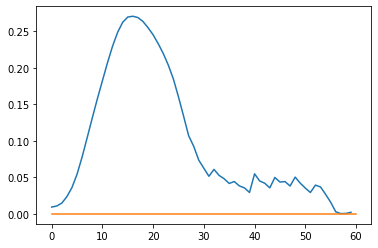

In [25]:
zz = preds_all.mean(0)[:,0]

train_md['prob'] = zz

plt.plot(train_md[['prob','pos_idx']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [26]:
log_loss(train_md['any'],train_md['prob'])

0.0934667744853716

(0, 5)

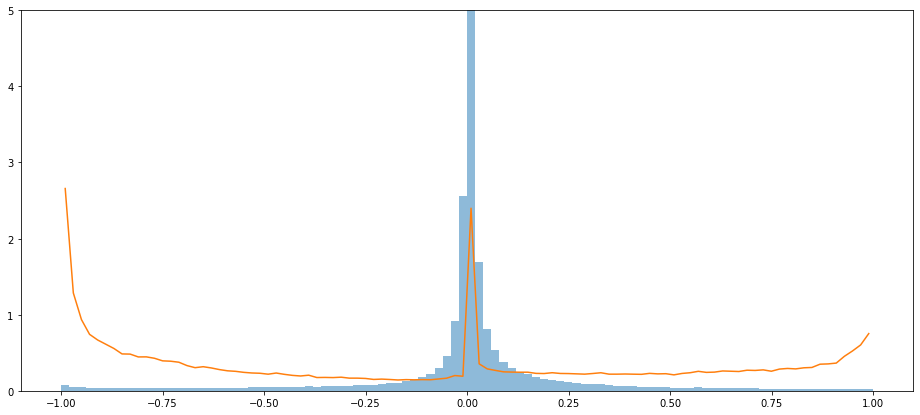

In [27]:
#zz = preds_all.mean(1)[0,:,0]
k=0
zz = preds_all.mean(0)[:,k]
#zz = preds_all[0,0,:,k]
#zz = scalePreds(zz,power=1.3)


plt.figure(figsize=(16, 7))
a = plt.hist(zz - train_md[all_ich[k]],bins=100,alpha=0.5,density=True)
b = 0.5*(a[1][1:] + a[1][:-1])
plt.plot(b,-7*np.log(1-abs(b))*a[0])
plt.ylim([0,5])

In [28]:
np.set_printoptions(precision=2)
zz = preds_all.mean(0)
for k in range(6):
    print(k,np.quantile(zz[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [3.57e-05 6.13e-05 9.31e-05 1.79e-03 9.95e-01 9.98e-01 9.99e-01]
1 [7.12e-06 9.84e-06 1.44e-05 9.54e-05 8.47e-02 4.76e-01 8.64e-01]
2 [1.66e-05 2.25e-05 3.18e-05 3.06e-04 9.82e-01 9.94e-01 9.97e-01]
3 [8.39e-06 1.13e-05 1.72e-05 1.02e-04 9.76e-01 9.92e-01 9.95e-01]
4 [2.32e-05 3.56e-05 5.27e-05 4.59e-04 9.57e-01 9.92e-01 9.96e-01]
5 [2.51e-05 4.16e-05 6.20e-05 9.25e-04 9.68e-01 9.93e-01 9.96e-01]


## Bounding

In [29]:
preds_all.shape

(10, 752797, 6)

In [30]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.057490836031309125


In [31]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.057490836031309125
any too low inconsistencies
1 class: 0.004179878506423379
2 class: 0.025429033325053103
3 class: 0.012410782720972586
4 class: 0.033147714456885455
5 class: 0.09211925658577279
total 0.14343999776832267
any too low corrected score 0.05748886375218989
any too high inconsistencies
total 0.24964844440134593
any too high corrected score 0.0574848864789516


In [32]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.0574848864789516


## Models behavior per groups

In [33]:
np.set_printoptions(precision=4)
for col in ['PxlMin_zero']:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all)) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:2d}: {:6d} {:6d} {}'.format(i,sz,sz_test,res))

 0: 452096  84109 [0.0744 0.0723 0.0724 0.0725 0.0742 0.0729 0.073  0.072  0.0718 0.0718]
 1: 300701  37123 [0.0418 0.0406 0.0404 0.0408 0.0425 0.0415 0.0417 0.041  0.0405 0.0406]


# Inference

In [84]:
stg = time.time()

#for ds in (my_datasets3 + my_datasets5):
for ds in [14]:
    folds = getNFolds(ds)
    preds = []
    for fold in range(folds):
        preds2 = []
        for anum in range(32):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 13
loading model model.b13.f0.d14.v35
adding dummy serieses 2
DataSet 14 test size 3520 fold 0
dataset test: 3520 loader test: 110 anum: 0
setFeats, augmentation -1


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/edisk/running/features/se_resnet101_5n/test2/test.f0.a0'

In [ ]:
#11221.892060995102

In [ ]:
#total time 1466.092379808426 5x8
#total time 5399.404406309128 5x32

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [34]:
preds_all.shape

(10, 752797, 6)

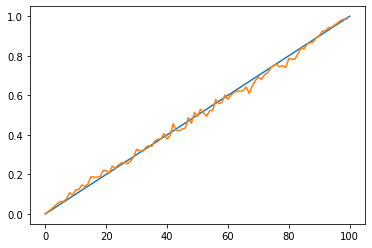

In [35]:
#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)
dd = pd.DataFrame(preds_all.mean(0), columns=all_ich)

k=5
plt.plot([0,100],[0,1])
plt.plot(train_md[[all_ich[k]]].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean().values)

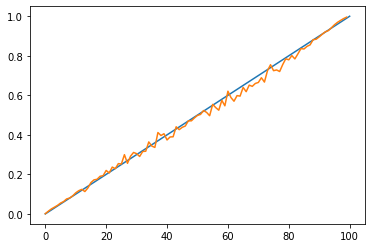

In [36]:
k = 0
dd = pd.DataFrame((preds_all.mean(0)), columns=all_ich)
vals = (train_md[all_ich[k]]*train_md['weights']).groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()/ \
    train_md['weights'].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()

#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)

plt.plot([0,100],[0,1])
plt.plot(vals.values)

In [37]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k], eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.05430755335203294


In [38]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k]**(0.9), eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.05507244939620463


In [71]:
%run ./Code.ipynb

In [39]:
stats_fn = PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION)
if stats_fn.is_file():
    stats_fn.unlink()

In [43]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=True)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 4
obj  0.08727681341480276
obj  0.08727680961247067
obj  0.08727681635930583
obj  0.08727683790936251
obj  0.08727727172526722
obj  0.0872790250770156
obj  0.08728207769630063
obj  0.08730524551710207
obj  0.08741163374725006
obj  0.08737828492011111
obj  0.08728987139098107
obj  0.08727957160159115
obj  0.08727743735897546
obj  0.08727694643886197
obj  0.08727683642000757
obj  0.08727680763252753
obj  0.08727680110920166
obj  0.0872767999865726
model [0.5022 0.4978] sum 0.9999676813453886
my_len 4
v34 f0 t0: original ll 0.0935/0.0886, ensemble ll 0.0935/0.0886
running time 3.408698320388794
starting fold 0 target 1
my_len 4
obj  0.012081623796648948
obj  0.012064844467400441
obj  0.012069603621018268
obj  0.012057825517191024
obj  0.012063435473538067
obj  0.012078578108915878
obj  0.012068894688607414
obj  0.012071291095892334
obj  0.012059318504672595
obj  0.012042443367714269
obj  0.012035341615015361
obj  0.012028032305076937
obj  0.0120277754348978

obj  0.03861288644457599
obj  0.03861282478178117
obj  0.03861282377857218
obj  0.03861282377493841
model [0.3423 0.6557] sum 0.998008898781132
my_len 4
v34 f2 t2: original ll 0.0370/0.0348, ensemble ll 0.0369/0.0348
running time 3.07651686668396
starting fold 2 target 3
my_len 4
obj  0.022995224518522383
obj  0.02299340932717575
obj  0.022993385766960923
obj  0.0229934166686739
obj  0.022994249545199564
obj  0.0230039489232303
obj  0.02301358839178314
obj  0.023040209826170773
obj  0.023015709942233124
obj  0.02303114245854406
obj  0.022971532575813594
obj  0.022959230997852857
obj  0.02295682416350499
obj  0.022956168474470892
obj  0.022955983453470243
obj  0.02295594581037717
obj  0.022955942947855967
model [0.2945 0.7055] sum 0.9999997552090265
my_len 4
v34 f2 t3: original ll 0.0236/0.0230, ensemble ll 0.0235/0.0229
running time 3.2023861408233643
starting fold 2 target 4
my_len 4
obj  0.05949662701641982
obj  0.059496427471729306
obj  0.059496342460381116
obj  0.059496656778369565

In [40]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 4
obj  0.0933852150101332
obj  0.09338046248442476
obj  0.09338029486041102
obj  0.09338035972731744
obj  0.0933811143108087
obj  0.09338210596694844
obj  0.09338474272802534
obj  0.09340376645538785
obj  0.0934854721225016
obj  0.09345651504702965
obj  0.09338703775747244
obj  0.09338029268632698
obj  0.09337958969300378
obj  0.09337955385335427
obj  0.0933795535198863
model [0.5182 0.4808] sum 0.9989492472281913
my_len 4
v33 f0 t0: original ll 0.0935/0.0887, ensemble ll 0.0935/0.0887
running time 3.2507238388061523
starting fold 0 target 1
my_len 4
obj  0.013897395265353997
obj  0.013881880847430866
obj  0.013885991780512735
obj  0.013876246790549903
obj  0.013881127990830817
obj  0.013894008184175567
obj  0.013882457611996777
obj  0.013884478813005323
obj  0.013863346223612806
obj  0.01383540008841151
obj  0.013825250237213925
obj  0.013818474145475493
obj  0.01381843625969093
obj  0.013818436182581805
obj  0.013818405670253893
model [0.2427 0.7373] s

obj  0.040770119816992766
model [0.3174 0.68  ] sum 0.9973906231915857
my_len 4
v33 f2 t2: original ll 0.0370/0.0348, ensemble ll 0.0370/0.0348
running time 3.0440049171447754
starting fold 2 target 3
my_len 4
obj  0.023823516135291243
obj  0.02382017911708748
obj  0.023820106378154727
obj  0.023820136798804403
obj  0.023820572725337157
obj  0.02383469183098074
obj  0.02384809531847105
obj  0.023873357339416913
obj  0.02385181419582523
obj  0.02386641578011786
obj  0.023805227006125536
obj  0.023802547496832128
obj  0.023801797197722675
obj  0.02380161177878747
obj  0.02380158861610797
model [0.3532 0.6468] sum 0.9999989006282439
my_len 4
v33 f2 t3: original ll 0.0236/0.0230, ensemble ll 0.0236/0.0229
running time 3.017551898956299
starting fold 2 target 4
my_len 4
obj  0.06243179531025402
obj  0.062427099035585125
obj  0.06242713613481103
obj  0.062430316328200154
obj  0.06243658002881348
obj  0.062430816202982437
obj  0.06243507738993893
obj  0.06244554339226623
obj  0.06242743494661

In [41]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))
stats.groupby(['weighted','target'])[['valid_loss','valid_loss_ens','valid_w_loss','valid_w_loss_ens']].mean()

valid_loss  valid_loss_ens  valid_w_loss  valid_w_loss_ens
weighted target                                                            
False    0         0.093420        0.093428      0.087781          0.087797
         1         0.014243        0.014183      0.012694          0.012633
         2         0.039539        0.039512      0.037398          0.037367
         3         0.023751        0.023728      0.022988          0.022953
         4         0.061900        0.061866      0.058991          0.058947
         5         0.076200        0.076194      0.072653          0.072625

In [46]:
# STAGE2 weighted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057518,0.057518
valid_w_loss,0.054293,0.054293
valid_loss_ens,0.057500,0.057498
valid_w_loss_ens,0.054274,0.054269


In [52]:
# STAGE2 non-wegihted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057496,0.057496
valid_w_loss,0.054326,0.054326
valid_loss_ens,0.057477,0.057475
valid_w_loss_ens,0.054303,0.054299


In [41]:
# wegihted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057750,0.057750
valid_w_loss,0.061831,0.061831
valid_loss_ens,0.057658,0.058210
valid_w_loss_ens,0.062176,0.061514


In [51]:
# non-weighted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057661,0.057661
valid_w_loss,0.062715,0.062715
valid_loss_ens,0.057638,0.057799
valid_w_loss_ens,0.062705,0.062648


In [43]:
np.set_printoptions(precision=4)
res2_all = []
for target in range(6):
    res2 = np.zeros((3, 2))
    for fold in range(3):
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'
                                 .format(fold,target,VERSION),'rb'))
        res2[fold] = model.x
        #print(fold,target,model.x)
    print(target, res2.mean(0), res2.mean(0).sum())
    res2_all.append(res2)
print('total', np.stack(res2_all).mean((0,1)), np.stack(res2_all).mean((0,1)).sum())

0 [0.5599 0.4398] 0.9996370455376221
1 [0.2003 0.7864] 0.9866685528969734
2 [0.3142 0.6845] 0.99873854778024
3 [0.3394 0.6606] 0.9999990672969397
4 [0.2394 0.7571] 0.9964796234369401
5 [0.3639 0.6317] 0.9955373459864658
total [0.3362 0.66  ] 0.9961766971558637


In [44]:
preds3 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets3])
preds5 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets5])

In [45]:
preds = np.concatenate([preds3.mean((1,2)), preds5.mean((1,2))],axis=0)

In [50]:
#del test_md['yuval_idx']

In [46]:
yuval_test = pickle.load(open(PATH_DISK/'yuval/ensemble_test_image_ids_stage2.pkl','rb'))
assert len(yuval_test) == len(test_md)

df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [47]:
names_y3 = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl',
'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl',
'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl'
]

In [48]:
names_y5 = [
'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl',
'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl',
'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_stage2_3_type_test_pred_ensemble_split_{}.pkl',
]

In [49]:
preds_y3 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF_stage2'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y3])

In [50]:
preds_y5 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF_stage2'/name.format(fold),'rb'))) for fold in range(5)])).numpy() for name in names_y5])

In [51]:
preds_y = np.concatenate([preds_y3.mean((1,2)), preds_y5.mean((1,2))],axis=0)

In [52]:
preds_y = preds_y[:,test_md.yuval_idx]
preds_y = preds_y[:,:,np.array([5,0,1,2,3,4])]

In [53]:
preds = np.concatenate([preds, preds_y], axis=0)

In [54]:
preds = preds[ds_mask]

In [55]:
preds.shape

(10, 121232, 6)

In [56]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.000837237693018345
2 class: 0.016652369011482118
3 class: 0.008991850336544807
4 class: 0.016291903127887027
5 class: 0.05360135937706216
total 0.08837930579384981
any too high inconsistencies
total 0.21430810347103074


In [70]:
#predictions = preds.mean((0,1))

In [57]:
stg = time.time()

test_preds_trgt = []
print('version', VERSION, 'my_len', my_len)
for target in range(6):
    
    test_preds_fold = []
    for fold in range(3):
        X = np.stack([preds[:my_len,:,target].mean(0), 
                      preds[my_len:,:,target].mean(0)], axis=0)
        
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'.format(fold,target,VERSION),'rb'))
        test_preds_fold.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    test_preds_trgt.append(np.stack(test_preds_fold).mean(0))

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

version 33 my_len 4
total running time 0.07065796852111816


In [58]:
np.corrcoef(preds[:,:,0])

array([[1.    , 0.9956, 0.9954, 0.9953, 0.9958, 0.9937, 0.9942, 0.9947,
        0.9946, 0.9943],
       [0.9956, 1.    , 0.9978, 0.9977, 0.9951, 0.997 , 0.9964, 0.9986,
        0.997 , 0.9967],
       [0.9954, 0.9978, 1.    , 0.9992, 0.9951, 0.9956, 0.9972, 0.9966,
        0.9984, 0.9978],
       [0.9953, 0.9977, 0.9992, 1.    , 0.995 , 0.9957, 0.9973, 0.9967,
        0.9982, 0.9985],
       [0.9958, 0.9951, 0.9951, 0.995 , 1.    , 0.9944, 0.9949, 0.9954,
        0.9955, 0.9951],
       [0.9937, 0.997 , 0.9956, 0.9957, 0.9944, 1.    , 0.9965, 0.998 ,
        0.9968, 0.9967],
       [0.9942, 0.9964, 0.9972, 0.9973, 0.9949, 0.9965, 1.    , 0.9971,
        0.9983, 0.9982],
       [0.9947, 0.9986, 0.9966, 0.9967, 0.9954, 0.998 , 0.9971, 1.    ,
        0.9979, 0.9977],
       [0.9946, 0.997 , 0.9984, 0.9982, 0.9955, 0.9968, 0.9983, 0.9979,
        1.    , 0.9993],
       [0.9943, 0.9967, 0.9978, 0.9985, 0.9951, 0.9967, 0.9982, 0.9977,
        0.9993, 1.    ]])

In [59]:
predictions.shape

(121232, 6)

# Submitting

In [60]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})
sub.to_csv(PATH/'sub.csv', index=False)

## Sanity checks

In [61]:
test_md['pred_any'] = predictions[:,0]

In [62]:
test_md.sort_values('pred_any').head()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
12436,68c2b8b03,ID_68c2b8b03,CT,ID_db5b61c1,ID_451abcb4a1,ID_36778f2a4a,NaN,"['-125.000', '-148.300', '135.250']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064000,-1.548000,-1.402099,-1.620352,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-125.0,-148.3,135.250000,0.488281,0.488281,40.0,NaN,True,150.0,NaN,1,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,-0.720000,1.0,0.0,1.0,1.0,-1.110667,0.0,-0.045487,0.0,-0.480,1.0,False,2,0.5810,-0.1190,0.5,1.355932,37,-1.016949,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,1,0.266667,1.771429,1.6,-0.600000,1,1,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,80726,0.000082
82308,7f95e978e,ID_7f95e978e,CT,ID_ae6fa62a,ID_3a1815c27a,ID_64db061397,NaN,"['-108.000', '-116.300', '114.000']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.421875', '0.421875']",16,16,15,1,40,100,-1024.0,1.0,-0.064000,-1.572000,-1.392679,-1.599246,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-108.0,-116.3,114.000000,0.421875,0.421875,40.0,NaN,True,100.0,NaN,2,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,1.733333,0.0,0.0,1.0,1.0,-0.684000,0.0,-0.075931,1.0,1.295,0.0,False,2,0.4760,-0.1840,-0.1,1.016949,32,-1.084746,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,4,0.000000,1.878788,0.0,-0.600000,0,1,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,68171,0.000082
60800,84735b84a,ID_84735b84a,CT,ID_ddcad7d4,ID_d7e80c40be,ID_11c94b7b33,NaN,"['-155', '23', '138.699997']","['1', '0', '0', '0', '1', '0']",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00036', '00036']","['00080', '00080']",-1024.0,1.0,1.314667,-1.914667,-2.872322,-0.693297,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-155.0,23.0,138.699997,0.488281,0.488281,36.0,36.0,False,80.0,80.0,0,0,0,1,-1.333333,1.0,...,-0.666667,1.0,False,0.480000,0.0,0.0,1.0,1.0,1.173333,1.0,-0.040544,0.0,-0.480,1.0,False,1,0.5748,-0.1252,0.1,1.152542,34,-1.084746,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,2,0.266666,1.885714,0.0,-0.599994,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,27981,0.000083
102453,d6a5e0432,ID_d6a5e0432,CT,ID_73887cfd,ID_4cc0b3574d,ID_bd88957d37,NaN,"['-125.000', '-131.700', '105.000']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064000,-1.558667,-1.401150,-1.616006,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-125.0,-131.7,105.000000

In [63]:
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
100029,d3bd67ff1,ID_d3bd67ff1,CT,ID_07aa4e90,ID_19039aeb7f,ID_83a456ed02,NaN,"['-125', '-5.28788193', '235.817384']","['1', '0', '0', '0', '0.927183855', '-0.374606...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.093333,-0.618874,1.229975,False,True,1.0,0.0,0.0,0.0,0.927184,-0.374607,-125.000000,-5.287882,235.817384,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.695785,0.0,...,0.835956,0.0,False,-0.72,1.0,0.0,1.0,1.0,0.796162,1.0,0.098592,0.0,-0.480000,1.0,False,2,1.202425,0.502892,-0.7,0.000000,17,-0.474576,2.247192,2.247192,3,3,0.0,0.0,0.0,0.0,0.0,0.0,3,0.263550,0.518123,0.0,-0.575802,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,52190,0.998915
101618,b5c2fbbe1,ID_b5c2fbbe1,CT,ID_877a2214,ID_f5d8b2ad40,ID_c37347c9a3,NaN,"['-126.408875', '-126.408875', '92.449158']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.494750976563', '0.494750976563']",16,16,15,1,35.000000,135.000000,-1024.0,1.0,1.301333,0.148000,-0.975081,1.044669,False,True,1.0,0.0,0.0,0.0,1.000000,0.000000,-126.408875,-126.408875,92.449158,0.494751,0.494751,35.0,NaN,True,135.0,NaN,3,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,-0.72,0.0,1.0,1.0,1.0,-0.818785,0.0,-0.106806,0.0,-0.480000,0.0,True,3,0.609797,-0.010203,-0.3,0.135593,19,-0.338983,-1.500000,-1.500000,3,3,1.0,1.0,0.0,0.0,1.0,1.0,0,-0.266667,0.451613,0.0,-0.600000,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,93649,0.998922
54912,5519471d4,ID_5519471d4,CT,ID_35384be6,ID_cc5b6c0a29,ID_5d7a4ca229,NaN,"['-125', '72.8792912', '193.380843']","['1', '0', '0', '0', '0.920504853', '-0.390731...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,1.525333,-0.941557,1.166305,False,True,1.0,0.0,0.0,0.0,0.920505,-0.390731,-125.000000,72.879291,193.380843,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.606731,0.0,...,0.728459,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.838391,1.0,0.037795,0.0,-0.480000,1.0,False,2,1.078723,0.490115,-0.7,-0.271186,13,-0.203390,1.726074,1.723938,3,3,0.0,0.0,0.0,0.0,0.0,0.0,3,-0.475944,-0.074042,0.0,-0.598386,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,115357,0.998966
29363,dfc1d30ba,ID_dfc1d30ba,CT,ID_7ed798ca,ID_bca01d4025,ID_bf75646cb6,NaN,"['-132.5', '13.0711274', '189.612208']","['1', '0', '0', '0', '0.965925826',

In [64]:
test_md['pred_any'] = predictions[:,1]
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
85421,ba1a7894c,ID_ba1a7894c,CT,ID_6f87831a,ID_a6ca244172,ID_d00cee7f0c,NaN,"['-125.000000', '-119.997978', '127.192337']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,30,80,-1024.0,1.0,-1.365333,0.310667,1.642553,-0.881730,False,True,1.0,0.0,0.0,0.0,0.927184,-0.374607,-125.0,-119.997978,127.192337,0.488281,0.488281,30.0,NaN,True,80.0,NaN,0,1,3,0,-1.333333,0.0,...,-0.666667,0.0,True,-0.72,1.0,0.0,1.0,1.0,-0.733306,0.0,-0.057031,0.0,-0.48,1.0,False,0,0.918601,0.249929,-0.3,-0.338983,12,0.135593,1.695991,1.696335,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.057814,-0.451618,0.0,-0.599737,0,0,True,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,111470,0.902253
46168,7f9480ae5,ID_7f9480ae5,CT,ID_61101bd3,ID_6aca8f9834,ID_1cb45bbcea,NaN,"['-125', '42.4079503', '222.344198']","['1', '0', '0', '0', '0.939692621', '-0.342020...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.006667,-0.700807,1.484853,False,True,1.0,0.0,0.0,0.0,0.939693,-0.342020,-125.0,42.407950,222.344198,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.862568,0.0,...,1.053199,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.432106,1.0,0.079290,0.0,-0.48,1.0,False,2,1.249860,0.592577,-0.3,-0.203390,14,0.000000,1.639649,1.660400,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.018112,-0.193775,0.0,-0.584230,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,35441,0.911084
90394,5d403bd8a,ID_5d403bd8a,CT,ID_61101bd3,ID_6aca8f9834,ID_1cb45bbcea,NaN,"['-125', '42.4079503', '206.464926']","['1', '0', '0', '0', '0.939692621', '-0.342020...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.010667,-0.780873,1.496547,False,True,1.0,0.0,0.0,0.0,0.939693,-0.342020,-125.0,42.407950,206.464926,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.862568,0.0,...,1.053199,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.432106,1.0,0.056540,0.0,-0.48,1.0,False,2,1.249860,0.592577,-0.3,-0.406780,11,0.203390,1.660400,1.639587,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.018112,-0.580318,0.0,-0.584230,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,35438,0.911625
23519,645917b86,ID_645917b86,CT,ID_61101bd3,ID_6aca8f9834,ID_1cb45bbcea,NaN,"['-125', '42.4079503', '211.7441']","['1', '0', '0', '0', '0.939692621', '-0.342020...",1,MONOCHROME2,512,512,"['0.48828125', '0.4882

In [65]:
test_md['pred_any'] = predictions[:,2]
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
56318,aaea1517d,ID_aaea1517d,CT,ID_e875aaac,ID_ace87fc419,ID_c2050c1b62,NaN,"['-126.408875', '-126.408875', '157.507935']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.494750976563', '0.494750976563']",16,16,15,1,35.000000,135.000000,-1024.0,1.0,1.301333,0.309333,-0.835506,1.294749,False,True,1.0,0.0,0.0,0.0,1.000000,0.000000,-126.408875,-126.408875,157.507935,0.494751,0.494751,35.0,NaN,True,135.0,NaN,3,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,-0.720000,0.0,1.0,1.0,1.0,-0.818785,0.0,-0.013599,0.0,-0.48,0.0,True,3,0.850032,-0.009968,0.9,1.016949,32,-0.406780,-1.500000,-1.500000,3,3,1.0,1.0,0.0,0.0,1.0,1.0,9,1.333334,0.976744,0.0,-0.599997,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,20605,0.995869
11838,8a3a7113f,ID_8a3a7113f,CT,ID_1f7020f7,ID_ffd91b71d1,ID_a0997b616a,NaN,"['-118', '20.437079', '167.587618']","['1', '0', '0', '0', '0.978147601', '-0.207911...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.126667,-0.975261,0.972069,False,True,1.0,0.0,0.0,0.0,0.978148,-0.207912,-118.000000,20.437079,167.587618,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,2.375301,0.0,...,1.947255,0.0,False,1.466667,0.0,0.0,1.0,1.0,1.139161,1.0,0.000842,0.0,-0.48,1.0,False,2,1.078350,0.445865,-0.3,-0.406780,11,0.203390,1.560669,1.539367,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.183431,-0.580297,0.0,-0.583175,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,49264,0.995902
60633,fd5080c37,ID_fd5080c37,CT,ID_16b922cc,ID_b48b0482e3,ID_653f493476,NaN,"['-125', '32.528565', '161.22819']","['1', '0', '0', '0', '0.939692621', '-0.342020...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,-0.090667,-0.796026,1.330736,False,True,1.0,0.0,0.0,0.0,0.939693,-0.342020,-125.000000,32.528565,161.228190,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.862568,0.0,...,1.053199,0.0,False,-0.720000,1.0,0.0,1.0,1.0,1.300381,1.0,-0.008269,0.0,-0.48,1.0,False,2,1.132596,0.432912,-0.1,-0.474576,10,0.406780,1.639588,1.660400,3,3,0.0,0.0,0.0,0.0,0.0,0.0,4,0.264557,-0.788021,0.0,-0.584137,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,59637,0.995940
30971,8dbff5245,ID_8dbff5245,CT,ID_f0ef989c,ID_fcdfd2db4e,ID_b9627ee31c,NaN,"['-125', '19.0514449', '123.026026']","['1', '0', '0', '0', '0.981627183', '-0.190

In [66]:
test_md['pred_any'] = predictions[:,3]
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
8592,2b3878103,ID_2b3878103,CT,ID_b81caf1c,ID_3d31a06240,ID_25c620d29b,NaN,"['-126.408875', '-126.408875', '77.500000']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.494750976563', '0.494750976563']",16,16,15,1,35.000000,135.000000,-1024.0,1.0,1.301333,0.394667,-0.776436,1.134899,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-126.408875,-126.408875,77.5,0.494751,0.494751,35.0,NaN,True,135.0,NaN,3,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,-0.720000,0.0,1.0,1.0,1.0,-0.818785,0.0,-0.128223,1.0,-0.4800,0.0,True,3,0.61,-0.01,-0.3,-0.067797,16,-0.135593,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,0,-0.266667,0.064516,0.0,-0.6,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,95036,0.995983
101233,734856256,ID_734856256,CT,ID_4482f018,ID_5ccd14e6b7,ID_b75da817b2,NaN,"['-126.438', '-126.438', '97.500']","['1.0', '0.0', '0.0', '0.0', '1.0', '0.0']",1,MONOCHROME2,512,512,"['0.4949', '0.4949']",16,16,15,1,35.0,135.0,-1024.0,1.0,1.301333,0.378667,-0.862722,1.089866,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-126.438000,-126.438000,97.5,0.494900,0.494900,35.0,NaN,True,135.0,NaN,3,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,1.241653,0.0,0.0,0.0,0.0,-0.819173,0.0,-0.099570,1.0,1.8792,0.0,False,3,0.67,0.01,-0.1,0.135593,19,-0.203390,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,4,0.000000,0.303030,0.0,-0.6,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,23495,0.996200
38580,1bb3fe555,ID_1bb3fe555,CT,ID_ca92b4e6,ID_e14681614d,ID_23f8022c7d,NaN,"['-126.408875', '-126.408875', '72.500000']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.494750976563', '0.494750976563']",16,16,15,1,35.000000,135.000000,-1024.0,1.0,1.301333,0.472000,-0.733947,1.184966,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-126.408875,-126.408875,72.5,0.494751,0.494751,35.0,NaN,True,135.0,NaN,3,1,3,0,-1.333333,1.0,...,-0.666667,1.0,False,-0.720000,0.0,1.0,1.0,1.0,-0.818785,0.0,-0.135387,1.0,-0.4800,0.0,True,3,0.61,-0.01,-0.3,-0.135593,15,-0.067797,-1.5,-1.5,3,3,1.0,1.0,0.0,0.0,1.0,1.0,0,-0.266667,-0.064516,0.0,-0.6,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,40054,0.996345
29351,5bd2084d9,ID_5bd2084d9,CT,ID_4482f018,ID_5ccd14e6b7,ID_b75da817b2,NaN,"['-126.438', '-126.438', '102.500']","['1.0', '0.0', '0.0', '0.0', '1.0', '0.0']",1,MONOCHROME2,512,512,"['0.4949', '0.4949']",16,16,15,1,35.0,135.0,-1024.0,1.0,1.301333,0.442667,-0.849438,1.059636,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-1

In [67]:
test_md['pred_any'] = predictions[:,4]
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
46433,f3a75309f,ID_f3a75309f,CT,ID_f6723c35,ID_fc07fac521,ID_cfd350c878,NaN,"['-125.000', '-118.558', '151.625']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064,0.292000,0.113617,-0.426832,False,True,1.0,0.0,0.0,0.0,0.961262,-0.275637,-125.0,-118.558,151.625,0.488281,0.488281,40.0,NaN,True,150.0,NaN,1,1,3,0,2.15016,0.0,...,1.495753,0.0,False,-0.72,1.0,0.0,1.0,1.0,-0.714107,0.0,-0.022027,0.0,-0.48,1.0,False,2,0.68972,0.127984,-0.7,0.406780,23,-0.881356,1.6005,1.6005,3,3,0.0,1.0,0.0,0.0,0.0,0.0,3,-0.655093,1.407408,0.0,-0.599615,0,1,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,55354,0.993246
59590,dc7e09cbd,ID_dc7e09cbd,CT,ID_f6723c35,ID_fc07fac521,ID_cfd350c878,NaN,"['-125.000', '-118.558', '130.820']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064,0.180000,0.216861,-0.102710,False,True,1.0,0.0,0.0,0.0,0.961262,-0.275637,-125.0,-118.558,130.820,0.488281,0.488281,40.0,NaN,True,150.0,NaN,1,1,3,0,2.15016,0.0,...,1.495753,0.0,False,-0.72,1.0,0.0,1.0,1.0,-0.714107,0.0,-0.051834,0.0,-0.48,1.0,False,2,0.68972,0.127984,-0.7,0.135593,19,-0.610169,1.6005,1.6005,3,3,0.0,1.0,0.0,0.0,0.0,0.0,3,-0.655093,0.814817,0.0,-0.599615,0,1,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,55350,0.993314
33815,397e899f6,ID_397e899f6,CT,ID_f6723c35,ID_fc07fac521,ID_cfd350c878,NaN,"['-125.000', '-118.558', '146.424']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064,0.218667,0.157382,-0.319805,False,True,1.0,0.0,0.0,0.0,0.961262,-0.275637,-125.0,-118.558,146.424,0.488281,0.488281,40.0,NaN,True,150.0,NaN,1,1,3,0,2.15016,0.0,...,1.495753,0.0,False,-0.72,1.0,0.0,1.0,1.0,-0.714107,0.0,-0.029479,0.0,-0.48,1.0,False,2,0.68972,0.127984,-0.7,0.338983,22,-0.813559,1.6010,1.6005,3,3,0.0,1.0,0.0,0.0,0.0,0.0,3,-0.655093,1.259268,0.0,-0.599615,0,1,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,55353,0.993623
2113,ed2a8477b,ID_ed2a8477b,CT,ID_f6723c35,ID_fc07fac521,ID_cfd350c878,NaN,"['-125.000', '-118.558', '141.222']","['1.000000', '0.000000', '0.000000', '0.000000...",1,MONOCHROME2,512,512,"['0.488281', '0.488281']",16,16,15,1,40,150,-1024.0,1.0,-0.064,0.169333,0.193354,-0.226621,False,True,1.0,0.0,0.0,0.0,0.961262,-0.275637,-125.0,-118.55

In [68]:
test_md['pred_any'] = predictions[:,5]
test_md.sort_values('pred_any').tail()

,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,test,test2,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,...,ImageOrientationPatient_5_f,ImageOrientationPatient_5_enc_0,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,PxlMin_grp_le,PxlMin_zero,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any_series,SeriesPP,yuval_idx,pred_any
9661,feb0a9076,ID_feb0a9076,CT,ID_252323d1,ID_0257ad04c2,ID_58b46714eb,NaN,"['-125', '24.4169536', '204.228683']","['1', '0', '0', '0', '0.990268069', '-0.139173...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.126667,-0.761993,1.166719,False,True,1.0,0.0,0.0,0.0,0.990268,-0.139173,-125.0,24.416954,204.228683,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,2.536908,0.0,...,2.405513,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.192226,1.0,0.053336,0.0,-0.48,1.0,False,2,1.099715,0.473493,-0.3,0.000000,17,-0.203390,1.527710,1.522339,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.225189,0.193609,0.0,-0.595692,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,49823,0.992338
107285,cfbf38afe,ID_cfbf38afe,CT,ID_6e75b42a,ID_b94674c76f,ID_93d835d9f3,NaN,"['-125', '17.5586391', '177.279488']","['1', '0', '0', '0', '0.933580426', '-0.358367...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.098667,-0.807341,1.049002,False,True,1.0,0.0,0.0,0.0,0.933580,-0.358368,-125.0,17.558639,177.279488,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.781072,0.0,...,0.944214,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.100782,1.0,0.014727,0.0,-0.48,1.0,False,2,1.051518,0.388022,-0.3,-0.135593,15,-0.067797,1.687011,1.663025,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.023307,-0.064219,0.0,-0.581939,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,74776,0.992465
81787,95aace9ba,ID_95aace9ba,CT,ID_6e75b42a,ID_b94674c76f,ID_93d835d9f3,NaN,"['-125', '17.5586391', '193.305489']","['1', '0', '0', '0', '0.933580426', '-0.358367...",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00040', '00040']","['00080', '00080']",-1024.0,1.0,1.301333,0.086667,-0.789830,0.920645,False,True,1.0,0.0,0.0,0.0,0.933580,-0.358368,-125.0,17.558639,193.305489,0.488281,0.488281,40.0,40.0,False,80.0,80.0,0,0,1,1,1.781072,0.0,...,0.944214,0.0,False,-0.72,1.0,0.0,1.0,1.0,1.100782,1.0,0.037687,0.0,-0.48,1.0,False,2,1.051518,0.388022,-0.3,0.067797,18,-0.271186,1.662964,1.687012,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.023307,0.322242,0.0,-0.581939,0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,False,-0.5,74779,0.992568
87951,5092c392f,ID_5092c392f,CT,ID_6e75b42a,ID_b94674c76f,ID_93d835d9f3,NaN,"['-125', '17.5586391', '187.979561']","['1', '0', '0', '0', '0.933580426', '-0.358367...",1,MONOCHROME2,51

In [66]:
preds.shape

(10, 121232, 6)

In [69]:
test_md['pred_any'] = preds[9,:,1]

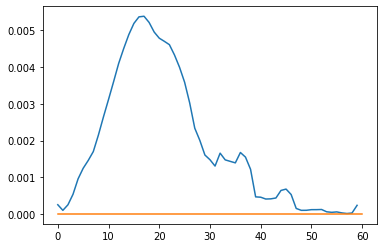

In [70]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

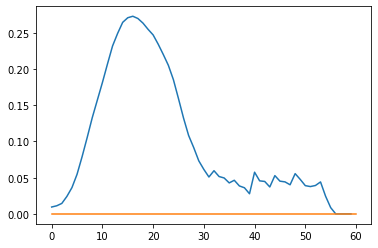

In [71]:
plt.plot(train_md[['pos_idx',all_ich[0]]].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [72]:
test_md['pred_any'] = predictions[:,1]

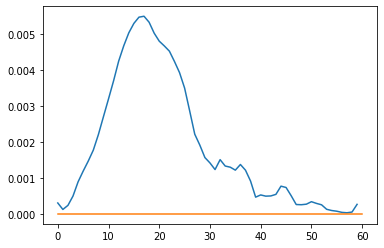

In [73]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [74]:
# weighted models + weighted ensembling
#0 [2.14e-04 2.50e-04 3.15e-04 2.15e-03 9.88e-01 9.93e-01 9.94e-01]
#1 [4.46e-06 5.32e-06 6.88e-06 8.58e-05 1.34e-01 6.16e-01 9.24e-01]
#2 [4.88e-05 5.54e-05 6.88e-05 3.27e-04 9.65e-01 9.86e-01 9.90e-01]
#3 [1.78e-05 2.00e-05 2.42e-05 1.04e-04 9.52e-01 9.77e-01 9.81e-01]
#4 [6.56e-05 7.67e-05 9.50e-05 4.71e-04 9.41e-01 9.85e-01 9.89e-01]
#5 [9.93e-05 1.21e-04 1.53e-04 9.91e-04 9.42e-01 9.86e-01 9.92e-01]

# weighted models + non-weighted ensembling
#0 [9.25e-05 1.11e-04 1.41e-04 1.60e-03 9.93e-01 9.97e-01 9.99e-01]
#1 [8.16e-06 9.69e-06 1.24e-05 9.28e-05 1.31e-01 5.91e-01 8.94e-01]
#2 [2.38e-05 2.66e-05 3.46e-05 2.46e-04 9.73e-01 9.91e-01 9.94e-01]
#3 [1.25e-05 1.40e-05 1.71e-05 8.06e-05 9.66e-01 9.90e-01 9.94e-01]
#4 [3.27e-05 3.80e-05 4.71e-05 3.55e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.51e-05 5.74e-05 7.40e-05 7.90e-04 9.46e-01 9.89e-01 9.94e-01]

# non-weighted models + non-weighted ensembling
#0 [1.10e-04 1.24e-04 1.55e-04 1.27e-03 9.93e-01 9.97e-01 9.98e-01]
#1 [8.61e-06 9.98e-06 1.23e-05 8.77e-05 1.36e-01 5.73e-01 8.74e-01]
#2 [2.34e-05 2.66e-05 3.41e-05 2.12e-04 9.73e-01 9.91e-01 9.95e-01]
#3 [1.08e-05 1.25e-05 1.50e-05 6.10e-05 9.67e-01 9.92e-01 9.96e-01]
#4 [3.18e-05 3.68e-05 4.48e-05 3.03e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.72e-05 5.48e-05 6.86e-05 6.83e-04 9.41e-01 9.88e-01 9.92e-01]

# STAGE2 non-weighted models + non-weighted ensembling
#0 [9.30e-05 1.15e-04 1.49e-04 1.64e-03 9.96e-01 9.98e-01 9.99e-01]
#1 [6.76e-06 8.61e-06 1.12e-05 7.63e-05 5.17e-02 3.93e-01 8.82e-01]
#2 [2.12e-05 2.46e-05 3.09e-05 2.84e-04 9.83e-01 9.93e-01 9.95e-01]
#3 [1.40e-05 1.65e-05 1.97e-05 8.68e-05 9.80e-01 9.93e-01 9.95e-01]
#4 [2.81e-05 3.21e-05 4.08e-05 4.00e-04 9.59e-01 9.90e-01 9.92e-01]
#5 [4.51e-05 5.60e-05 7.04e-05 8.55e-04 9.71e-01 9.89e-01 9.91e-01]

np.set_printoptions(precision=2)
for k in range(6):
    print(k,np.quantile(predictions[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [9.30e-05 1.15e-04 1.49e-04 1.64e-03 9.96e-01 9.98e-01 9.99e-01]
1 [6.76e-06 8.61e-06 1.12e-05 7.63e-05 5.17e-02 3.93e-01 8.82e-01]
2 [2.12e-05 2.46e-05 3.09e-05 2.84e-04 9.83e-01 9.93e-01 9.95e-01]
3 [1.40e-05 1.65e-05 1.97e-05 8.68e-05 9.80e-01 9.93e-01 9.95e-01]
4 [2.81e-05 3.21e-05 4.08e-05 4.00e-04 9.59e-01 9.90e-01 9.92e-01]
5 [4.51e-05 5.60e-05 7.04e-05 8.55e-04 9.71e-01 9.89e-01 9.91e-01]


In [75]:
# weighted models + weighted ensembling
#array([0.1361, 0.0056, 0.0429, 0.0295, 0.0468, 0.0569])

# weighted models + non-weighted ensembling
#array([0.1335, 0.0055, 0.0423, 0.0298, 0.0466, 0.0556])

# non-weighted models + non-weighted ensembling
#array([0.1313, 0.0057, 0.0421, 0.0297, 0.0464, 0.0544])

# STAGE2 non-weighted models + non-weighted ensembling
#array([0.1376, 0.0029, 0.0464, 0.0378, 0.0449, 0.0591])

# STAGE2 weighted models + weighted ensembling
#array([0.1373, 0.0028, 0.0464, 0.0379, 0.045 , 0.0589])

np.set_printoptions(precision=4)
predictions.mean(0)

array([0.1376, 0.0029, 0.0464, 0.0378, 0.0449, 0.0591])

In [76]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13762015847552184

In [77]:
sub = sub.sort_values('ID').reset_index(drop=True)
best_sub = pd.read_csv(PATH/'submission_stage2_3.csv').sort_values('ID').reset_index(drop=True)

In [78]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13749181676694883

In [79]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985190415749868, pvalue=0.0)

In [95]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985190415749868, pvalue=0.0)

In [78]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9992765979750622

In [96]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.999294961658725

## Submission

In [80]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/Hemorrhage/sub.csv -m "GCP, safe final, take 2"

100%|██████████████████████████████████████| 32.1M/32.1M [00:02<00:00, 16.2MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"